In [4]:
import numpy as np
import matplotlib.pyplot as plt
import moma_linear_predictions as lp 

Create the three model dataset we aim to infer

Text(0.5, 1.0, 'Bilinear with lag case ')

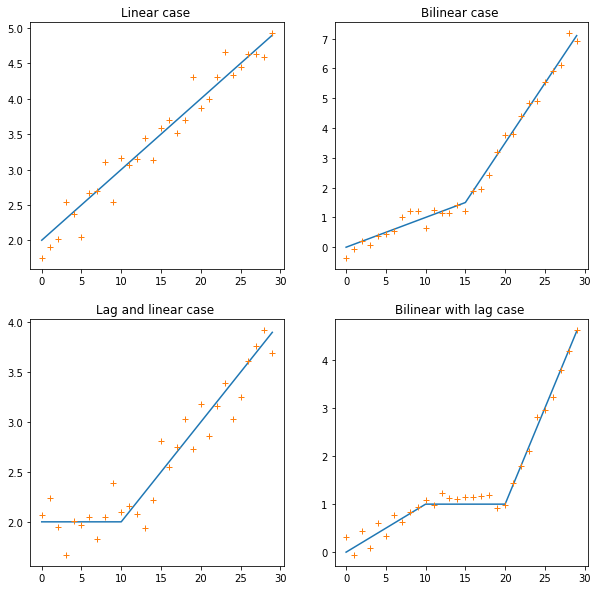

In [47]:
fig, axs = plt.subplots(2,2,figsize=(10, 10))
time = np.arange(30)
### Linear case (sg= standard deviation of measurment error)
slope = 0.1; x_0 = 2. ; sg = 0.2
x_linear = lp.build_D_vec2(time, None, None, True)
x_linear = slope*x_linear+x_0 
x_linear_noise = np.random.normal(x_linear,sg)
axs[0,0].plot(time,x_linear)
axs[0,0].plot(time,x_linear_noise,'+')
axs[0,0].set_title('Linear case ')
#### Lag and linear growth case 
slope = 0.1; x_0 = 2. ; sg = 0.2;tau1=10
x_lag = lp.build_D_vec2(time, tau1, False, False)
x_lag = slope*x_lag+x_0 
x_lag_noise = np.random.normal(x_lag,sg)
axs[1,0].plot(time,x_lag)
axs[1,0].plot(time,x_lag_noise,'+')
axs[1,0].set_title('Lag and linear case ')
#### Bilinear case 
slope1 = 0.1;slope2=0.2; x_0 = 2.;sg = 0.2;tau1=15
D0,D1 = lp.build_D_vec2(time, tau1, tau1, False)
x_bilin = slope1*D0+slope2*D1*+x_0 
x_bilin_noise = np.random.normal(x_bilin,sg)
axs[0,1].plot(time,x_bilin)
axs[0,1].plot(time,x_bilin_noise,'+')
axs[0,1].set_title('Bilinear case ')

#### Bilinear with lag case 
slope1 = 0.1;slope2=0.2; x_0 = 2.;sg = 0.2;tau1=10; tau2=20
D0,D1 = lp.build_D_vec2(time, tau1, tau2, False)
x_lag_bilin = slope1*D0+slope2*D1*+x_0 
x_lag_bilin_noise = np.random.normal(x_lag_bilin,sg)
axs[1,1].plot(time,x_lag_bilin)
axs[1,1].plot(time,x_lag_bilin_noise,'+')
axs[1,1].set_title('Bilinear with lag case ')




First let's do a simple linear fit for the tree different models. To do this we simply call the function predict

In [48]:
x_linear_lfit = lp.predict(x_linear_noise,linear=True,lag_linear=False,linear_lag_linear=False)
x_lag_lfit = lp.predict(x_lag_noise,linear=True,lag_linear=False,linear_lag_linear=False)
x_bilin_lfit = lp.predict(x_bilin_noise,linear=True,lag_linear=False,linear_lag_linear=False)
x_lag_bilin_lfit=lp.predict(x_lag_bilin_noise,linear=True,lag_linear=False,linear_lag_linear=False)

Text(0.5, 1.0, 'Bilinear with lag case ')

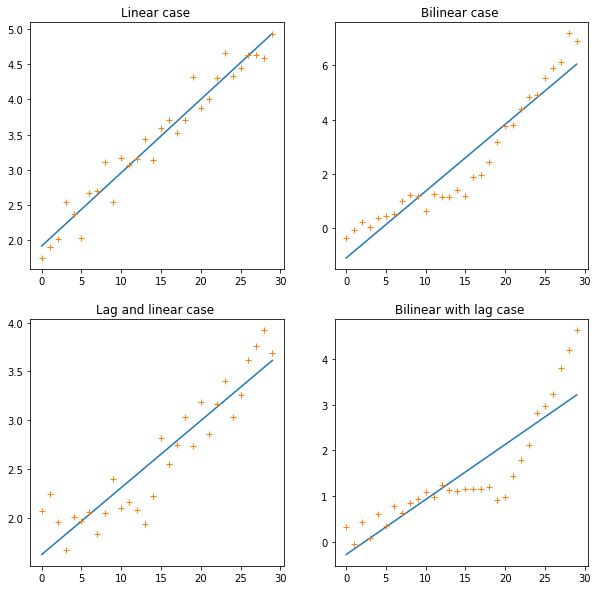

In [49]:
fig, axs = plt.subplots(2,2,figsize=(10, 10))
time = np.arange(30)
### Linear case
axs[0,0].plot(time,x_linear_lfit)
axs[0,0].plot(time,x_linear_noise,'+')
axs[0,0].set_title('Linear case ')
#### Lag and linear growth case 
axs[1,0].plot(time,x_lag_lfit)
axs[1,0].plot(time,x_lag_noise,'+')
axs[1,0].set_title('Lag and linear case ')
#### Bilinear case 

axs[0,1].plot(time,x_bilin_lfit)
axs[0,1].plot(time,x_bilin_noise,'+')
axs[0,1].set_title('Bilinear case ')

#### Bilinear with lag case 

axs[1,1].plot(time,x_lag_bilin_lfit)
axs[1,1].plot(time,x_lag_bilin_noise,'+')
axs[1,1].set_title('Bilinear with lag case ')




If we want to look at the parameters inferred we simply call the function predict_param. For example

In [50]:
print(lp.predict_param(x_linear_noise,linear=True,lag_linear=False,linear_lag_linear=False))

{'param': {'c0': array([[1.91964404]]), 'sigmas': 0.03877174064342218, 'd0': array([[0.10398636]]), 'tau1': None, 'tau2': None}}


infers an offset c0=1.92 very close to the offset we provided (x0=2). The predicted slope d0=0.104 is also very close to the real one (slope=0.1). The variance in the measurment error sigmas=0.039 is close to the variance of the given one sg=0.2 (sg is the standard deviation)